In [1]:
import os
import pydicom
import numpy as np
from PIL import Image
import shutil

# Set paths
input_dir = r"D:\vinbigdata-chest-xray-abnormalities-detection\train"
output_dir = r"D:\vinbigdata-chest-xray-abnormalities-detection\train_png"

# Ensure output directory is clean and exists
shutil.rmtree(output_dir, ignore_errors=True)  # Delete old files (optional)
os.makedirs(output_dir, exist_ok=True)

# Check if input directory exists
if not os.path.isdir(input_dir):
    print(f"❌ Input directory does not exist: {input_dir}")
    exit(1)

# Get all DICOM files
dicom_files = [f for f in os.listdir(input_dir) if f.lower().endswith(".dicom")]

# Debugging: Check if DICOM files are found
print(f"📂 Checking DICOM files in: {input_dir}")
print(f"🔍 Found {len(dicom_files)} DICOM files.")

# Check if output directory is writable
if not os.access(output_dir, os.W_OK):
    exit(1)

def convert_dicom_to_png(dicom_file):
    try:
        dicom_path = os.path.join(input_dir, dicom_file)
        output_path = os.path.join(output_dir, dicom_file.replace(".dicom", ".png"))

        # Read DICOM
        dicom = pydicom.dcmread(dicom_path)
        image = dicom.pixel_array  # Get pixel data

        # Check the Photometric Interpretation
        photometric_interpretation = dicom.get("PhotometricInterpretation", "UNKNOWN")
        
        # If the image is in MONOCHROME1, invert it to MONOCHROME2 due to dumb inversion
        if photometric_interpretation == "MONOCHROME1":
            image = np.invert(image)

        # Normalize if not 8-bit
        if image.dtype != np.uint8:
            image = (image - image.min()) / (image.max() - image.min()) * 255
            image = image.astype(np.uint8)

        # Convert grayscale to RGB
        image_rgb = Image.fromarray(image).convert("RGB")

        # Save PNG
        image_rgb.save(output_path, "PNG")
    except Exception as e:
        print(f"Error processing {dicom_file}: {e}")

# Process files one by one
for dicom_file in dicom_files:
    convert_dicom_to_png(dicom_file)

print("🎉 Conversion completed!")



📂 Checking DICOM files in: D:\vinbigdata-chest-xray-abnormalities-detection\train
🔍 Found 15000 DICOM files.
🎉 Conversion completed!


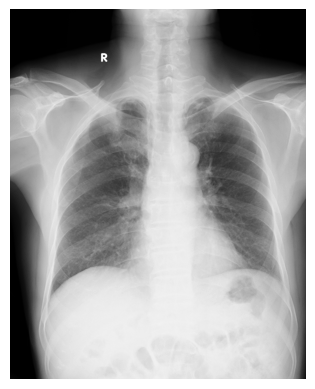

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Set the path to the DICOM file
dicom_file = r"D:\vinbigdata-chest-xray-abnormalities-detection\train\0007d316f756b3fa0baea2ff514ce945.dicom"

# Check if the file exists
if not os.path.isfile(dicom_file):
    print(f"❌ The file {dicom_file} does not exist!")
else:
    try:
        # Read the DICOM file
        dicom = pydicom.dcmread(dicom_file)
        
        # Extract the pixel data
        image = dicom.pixel_array
        
        np.invert(image)
        # Display the image
        plt.imshow(image, cmap='gray')  # Use 'gray' colormap for medical images
        plt.axis('off')  # Hide the axes for better visualization
        plt.show()
        
    except Exception as e:
        print(f"❌ Error processing the DICOM file: {e}")


In [13]:
import pydicom

# Path to the DICOM file
dicom_file = r"D:\vinbigdata-chest-xray-abnormalities-detection\train\01a1e85c56486eccd29f3e824e745c2a.dicom"

# Read the DICOM file
dicom = pydicom.dcmread(dicom_file)

# Print all the DICOM metadata
print(dicom)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 166
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 01a1e85c56486eccd29f3e824e745c2a
(0002,0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002,0012) Implementation Class UID            UI: 1.2.3.4
(0002,0013) Implementation Version Name         SH: 'INF_3.9'
(0002,0016) Source Application Entity Title     AE: 'TITAN'
-------------------------------------------------
(0010,0040) Patient's Sex                       CS: 'M'
(0010,1010) Patient's Age                       AS: '000Y'
(0028,0002) Samples per Pixel                   US: 1
(0028,0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028,0008) Number of Frames                    IS: '1'
(0028,0010) Rows           

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pydicom\valuerep.py:440: UserWarning: Invalid value for VR UI: '01a1e85c56486eccd29f3e824e745c2a'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)


In [1]:
import os
from PIL import Image
from skimage.transform import resize
import numpy as np

# Define source and destination directories
source_dir = r"D:\vinbigdata-chest-xray-abnormalities-detection\train_png"
destination_dir = r"D:\vinbigdata-chest-xray-abnormalities-detection\train_png_224"

# Create destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Resize images to 224x224 and save them in the destination directory
for filename in os.listdir(source_dir):
    if filename.endswith(".png"):  # Process only PNG images
        img_path = os.path.join(source_dir, filename)
        img = Image.open(img_path)
        
        # Convert image to numpy array for resizing using skimage.transform.resize
        img_array = np.array(img)
        resized_array = resize(img_array, (224, 224), anti_aliasing=True)
        
        # Convert back to PIL Image and save
        resized_img = Image.fromarray((resized_array * 255).astype(np.uint8))
        resized_img.save(os.path.join(destination_dir, filename))

print("Resizing complete. All images saved to:", destination_dir)


Resizing complete. All images saved to: D:\vinbigdata-chest-xray-abnormalities-detection\train_png_224
